<a href="https://colab.research.google.com/github/KengoTobita/Weeyble_Python_startup/blob/master/PUBG_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBGで分かるEDA
このノートブックは今年の冬に開催された[PUBG Finish Placement Prediction](https://www.kaggle.com/c/pubg-finish-placement-prediction/overview)のカーネルを纏めたものです

参考にしたカーネル
* [EDA is fun!](https://www.kaggle.com/deffro/eda-is-fun)
* [KaggleのPUBGデータ分析コンペで上位入り！ドン勝の秘訣は”連キルと潜伏”](http://www.mirandora.com/?p=2777)

環境
* **jupyter/datascience-notebook**<br>
dockerコンテナ。jupyter環境が一発でできる。
* **Python 3.7.3**

## PUBGのデータってなに？
公式ページの内容はこんな感じ。
>So, where we droppin' boys and girls?    
>Battle Royale-style video games have taken the world by storm. 100 players are dropped onto an island empty-handed and must explore, scavenge, and eliminate other players until only one is left standing, all while the play zone continues to shrink.    
>PlayerUnknown's BattleGrounds (PUBG) has enjoyed massive popularity. With over 50 million copies sold, it's the fifth best selling game >of all time, and has millions of active monthly players.    
>The team at PUBG has made official game data available for the public to explore and scavenge outside of "The Blue Circle." This competition is not an official or affiliated PUBG site - Kaggle collected data made possible through the PUBG Developer API.    
>You are given over 65,000 games' worth of anonymized player data, split into training and testing sets, and asked to predict final placement from final in-game stats and initial player ratings.   
>What's the best strategy to win in PUBG? Should you sit in one spot and hide your way into victory, or do you need to be the top shot? >Let's let the data do the talking!

#### PUBGのルールについて
ルールはとっても簡単。
1. 初対面の100人が無人島にパラシュート降下する。
1. 街中に落ちている銃火器を集め、使用して
1. 最後に残った一人が勝者。(通称、**ドン勝つ**)

わかんない人は以下の動画を見れば、なんとなくわかります。

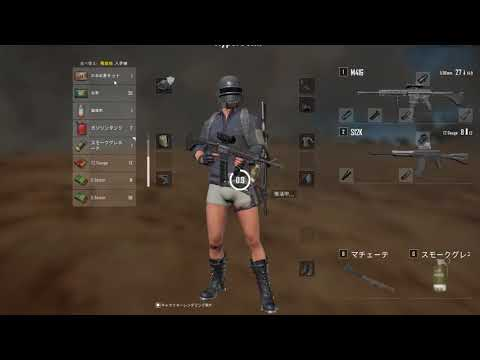

In [0]:
import IPython.display
IPython.display.YouTubeVideo("Sws64_AdR-o")

In [0]:
import warnings
warnings.filterwarnings('ignore')

## Pandasで読み込もう
Pandasとは、


pandas参考書籍 : [Pythonデータ分析/機械学習のための基本コーディング! pandasライブラリ活用入門 (impress top gear) ](https://www.amazon.co.jp/Python%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90-%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AE%E5%9F%BA%E6%9C%AC%E3%82%B3%E3%83%BC%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0-pandas%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E6%B4%BB%E7%94%A8%E5%85%A5%E9%96%80-impress-gear/dp/4295005657/ref=asc_df_4295005657/?tag=jpgo-22&linkCode=df0&hvadid=295723231663&hvpos=1o1&hvnetw=g&hvrand=13604344531496346359&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1009279&hvtargid=pla-601555356405&psc=1&th=1&psc=1)

***
それでは実際にコードを実行していきましょう。<br>
私の環境の場合、読み込みに少しだけ苦労しました。<br>
chmodはもとより、読み込みのためにpandasアップデートする必要がありました。<br>
皆さんの環境では必要が無いかもしれません。<br>

In [0]:
!ls

PUBG_datascience.ipynb	  sample_submission_V2.csv.zip	train_V2.csv
python_pd.ipynb		  test_V2.csv			train_V2.csv.zip
sample_submission_V2.csv  test_V2.csv.zip


さらに緊急事態が発生。<br>
私の環境がクソ雑魚過ぎてtrainデータが読み込めません。<br>
具体的にはメモリが足りなくてカーネルがリスタートすることになります。<br>
同情するならRAMをください。<br>
<br>
今回は諦めて、trainデータを一部読み込み、遊んで見ることにします。<br>

In [0]:
import pandas as pd 
from sklearn.model_selection import train_test_split

In [0]:
columns = ["Id" ,"groupId2" ,"matchId","assists", "boosts","damageDealt" ,"DBNOs" ,"headshotKills","heals" ,"killPlace","killPoints","kills","killStreaks" ,"longestKill","matchDuration","matchType","maxPlace","numGroups","rankPoints","revives","rideDistance","roadKills","swimDistance","teamKills","vehicleDestroys","walkDistance","weaponsAcquired","winPoints","winPlacePerc"]

In [0]:
df = pd.read_csv("train_V2.csv" ,header=None, skiprows=1734174)

In [0]:
df.columns = columns

In [0]:
df.shape

(2712793, 29)

In [0]:
df.head()

,Id,groupId2,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,d93bf10201b848,96c17147727135,13246373c74bf2,0,2,93.09,0,0,3,45,...,0,1115.0,0,0.00,0,0,1899.000,7,1561,0.7717
1,a6dd02a86da1f7,70168920eb02ce,b7f0c073046cae,1,1,132.20,2,0,10,68,...,1,1089.0,0,41.03,2,0,1909.000,6,1500,0.3704
2,a7dbbdae9a7513,5bfd346fe08d9a,5c742ff34ebf8c,0,0,0.00,0,0,0,72,...,0,0.0,0,0.00,0,0,5.633,0,0,0.2308
3,264f564608b924,ea56858bd4d6c7,53c90e4e099081,0,0,200.00,2,0,0,26,...,0,0.0,0,0.00,0,0,83.600,3,0,0.0000
4,019ddac1a9b43e,e119674afa60c6,ede7854b04dd6f,0,2,126.50,0,0,10,29,...,0,1080.0,1,0.00,0,0,882.700,5,0,0.5926


<table class="wp-block-table"><tbody><tr><td>winPlacePerc</td><td>予測する目的変数。勝利順位</td></tr><tr><td>matchId</td><td>試合ID</td></tr><tr><td>matchType</td><td>試合タイプ(“solo”、”duo”、”squad”など）</td></tr><tr><td>numGroups</td><td>その試合におけるグループ数</td></tr><tr><td>maxPlace</td><td>その試合における最下位順位</td></tr><tr><td>matchDuration</td><td>その試合が終わるまでの秒数</td></tr><tr><td>groupId</td><td>グループID</td></tr><tr><td>Id</td><td>プレイヤーID</td></tr><tr><td>kills</td><td>キル数</td></tr><tr><td>killStreaks</td><td>連続キル数</td></tr><tr><td>killPoints</td><td>キルベースのランキング</td></tr><tr><td>killPlace</td><td>その試合におけるキル数順位</td></tr><tr><td>longestKill</td><td>キルしたプレイヤーとの最長距離</td></tr><tr><td>DBNOs</td><td>ノックアウトした敵の数</td></tr><tr><td>assists</td><td>キルアシスト数(自分がダメージを与えてチームメイトがキルした数)</td></tr><tr><td>headshotKills</td><td>ヘッドショットでのキル数</td></tr><tr><td>damageDealt</td><td>与えたダメージ数（自傷ダメージは含めず）</td></tr><tr><td>boosts</td><td>ブーストアイテム使用数</td></tr><tr><td>heals</td><td>回復アイテム利用数</td></tr><tr><td>weaponsAcquired</td><td>武器入手数</td></tr><tr><td>revives</td><td>ノックアウトされたチームメイトを蘇生した数</td></tr><tr><td>walkDistance</td><td>歩行移動距離</td></tr><tr><td>rideDistance</td><td>乗り物に乗って移動した距離</td></tr><tr><td>roadKills</td><td>乗り物からキルした数</td></tr><tr><td>swimDistance</td><td>水泳距離</td></tr><tr><td>teamKills</td><td>チームメイトをキルした数</td></tr><tr><td>vehicleDestroys</td><td>乗り物を破壊した数</td></tr><tr><td>rankPoints</td><td>プライヤーランキング</td></tr><tr><td>winPoints</td><td>勝利数ベースのランキング</td></tr></tbody></table>


合数をカウントしてみましょう。<br>
これはpandasのuniqueを使用すればいけます。

In [0]:
len(df["matchId"].unique())

47965

In [0]:
df_train, df_test = train_test_split(df, test_size=0.3, shuffle = False)

メモリがしんどいので、dfを消します。

In [0]:
del df
df

NameError: name 'df' is not defined

In [0]:
print("df_train : ", df_train.shape)
print("df_test : ", df_test.shape)

df_train :  (1898955, 29)
df_test :  (813838, 29)


In [0]:
df_train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,...,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898955e+06,1.898954e+06
mean,2.336422e-01,1.107039e+00,1.306982e+02,6.578144e-01,2.266178e-01,1.371619e+00,4.760079e+01,5.045977e+02,9.247007e-01,5.437001e-01,...,1.645289e-01,6.059505e+02,3.467697e-03,4.503568e+00,2.382732e-02,8.020727e-03,1.154174e+03,3.661779e+00,6.058894e+02,4.728662e-01
std,5.873049e-01,1.716520e+00,1.707704e+02,1.145477e+00,6.050846e-01,2.682822e+00,2.746082e+01,6.274931e+02,1.558786e+00,7.109693e-01,...,4.724629e-01,1.496890e+03,7.329746e-02,3.046306e+01,1.667838e-01,9.322279e-02,1.183330e+03,2.466803e+00,7.395928e+02,3.073887e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.550000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.415000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.859000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.113000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.977000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,1.700000e+01,2.300000e+01,5.990000e+03,4.000000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.154000e+03,7.200000e+01,1.800000e+01,...,3.900000e+01,3.232000e+04,1.800000e+01,3.514000e+03,6.000000e+00,5.000000e+00,1.625000e+04,2.360000e+02,2.000000e+03,1.000000e+00


In [0]:
df_train.head()

,Id,groupId2,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,d93bf10201b848,96c17147727135,13246373c74bf2,0,2,93.09,0,0,3,45,...,0,1115.0,0,0.00,0,0,1899.000,7,1561,0.7717
1,a6dd02a86da1f7,70168920eb02ce,b7f0c073046cae,1,1,132.20,2,0,10,68,...,1,1089.0,0,41.03,2,0,1909.000,6,1500,0.3704
2,a7dbbdae9a7513,5bfd346fe08d9a,5c742ff34ebf8c,0,0,0.00,0,0,0,72,...,0,0.0,0,0.00,0,0,5.633,0,0,0.2308
3,264f564608b924,ea56858bd4d6c7,53c90e4e099081,0,0,200.00,2,0,0,26,...,0,0.0,0,0.00,0,0,83.600,3,0,0.0000
4,019ddac1a9b43e,e119674afa60c6,ede7854b04dd6f,0,2,126.50,0,0,10,29,...,0,1080.0,1,0.00,0,0,882.700,5,0,0.5926


In [0]:
len(df_train.loc[:,"matchId"].unique())

47965

## Explanatory Data Analysis(探索的データ解析)って何？
データの特徴を解析することを目的とした分析。<br>
分析するデータにある相関関係やパターンを分析することが目的。

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns 

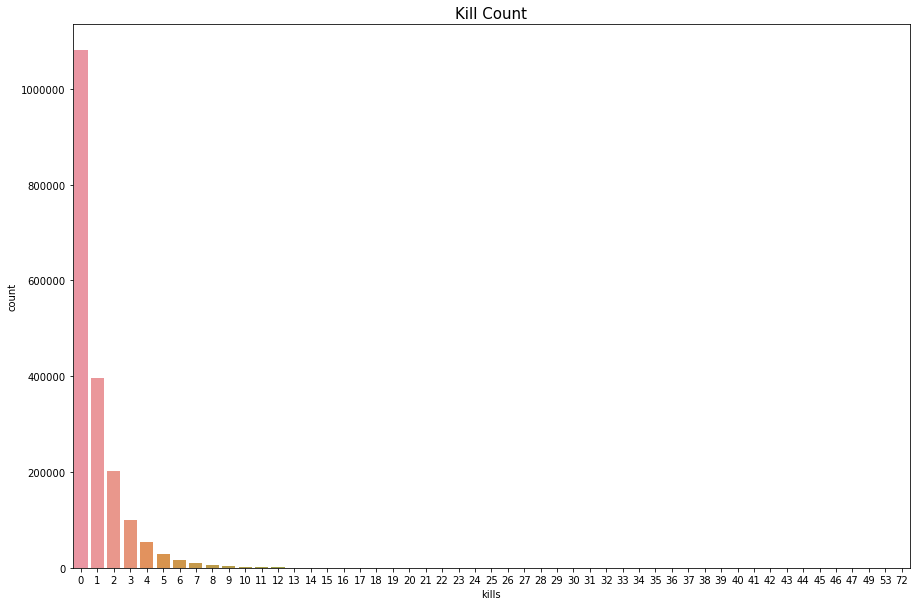

In [0]:
plt.figure(figsize=(15,10))
sns.countplot(df_train['kills'])
plt.title("Kill Count",fontsize=15)
plt.show()

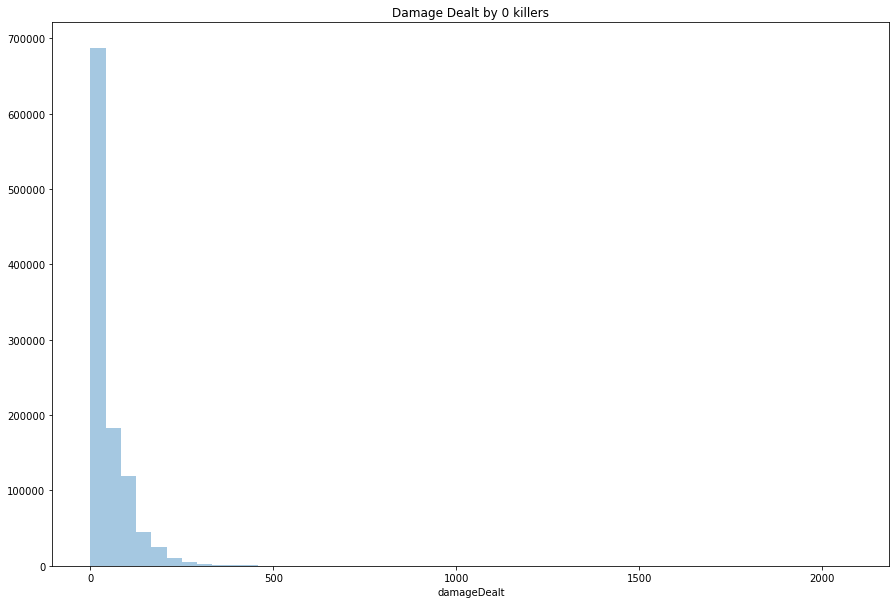

In [0]:
data = df_train[df_train['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers")
sns.distplot(data['damageDealt'], kde=False)
plt.show()

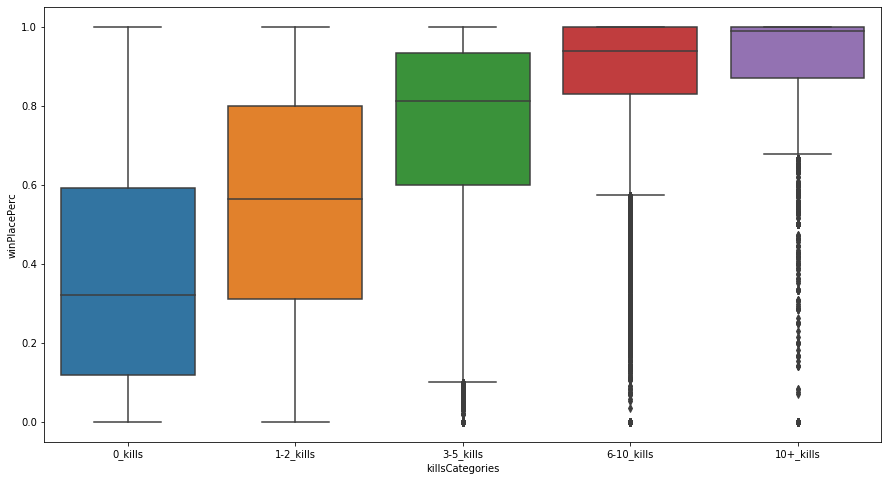

In [0]:
kills = df_train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

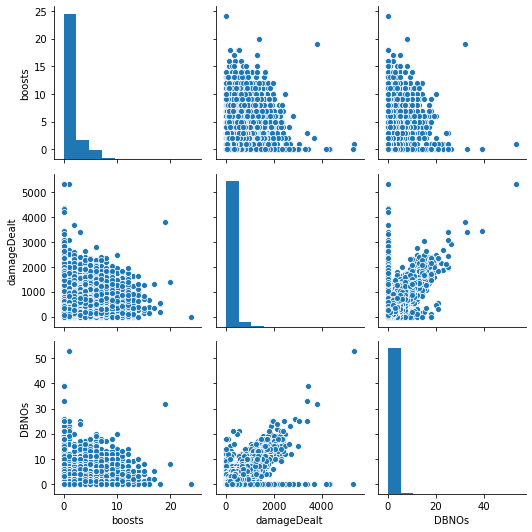

In [0]:
cols = df_train.columns[4:7]

sns.pairplot(df_test[cols], size=2.5)
plt.tight_layout()
plt.show()

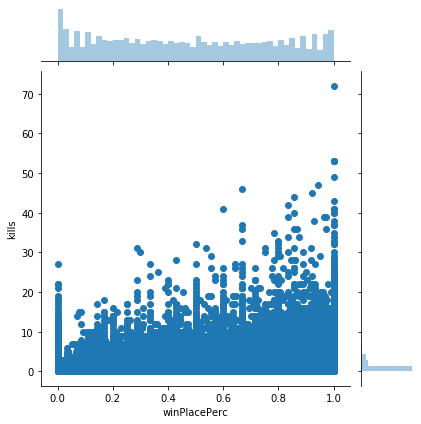

In [0]:
sns.jointplot("winPlacePerc", "kills", data = df_train)
# sns.jointplot("winPlacePerc", "kills", data = df_train, kind = "hex")
# sns.jointplot(("winPlacePerc", "kills", data = df_train, kind = "kde")

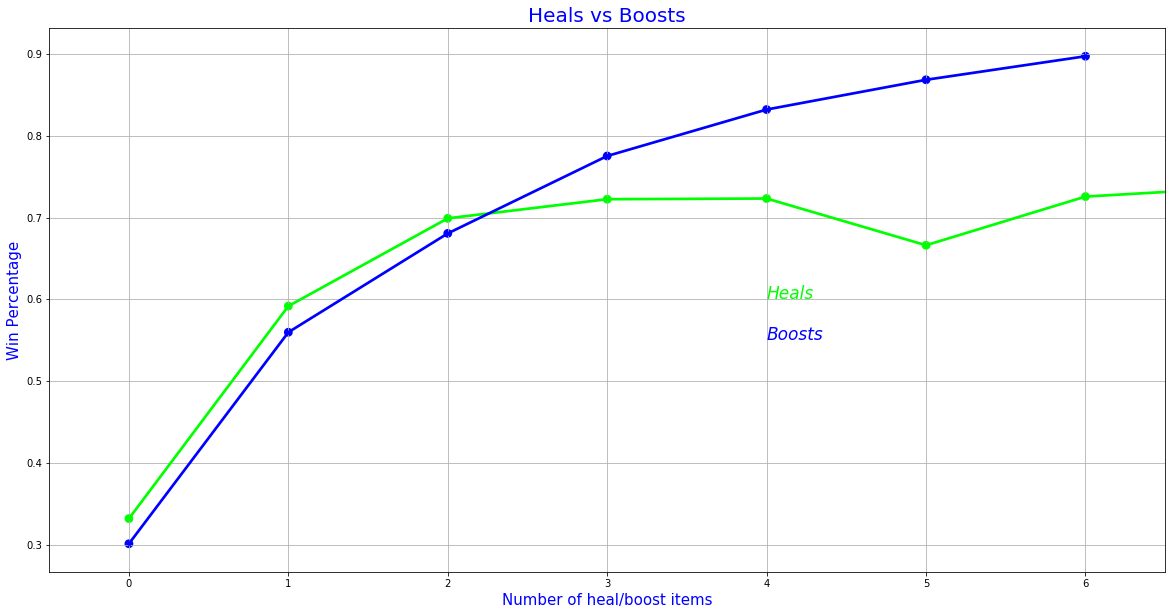

In [0]:
data = df_train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

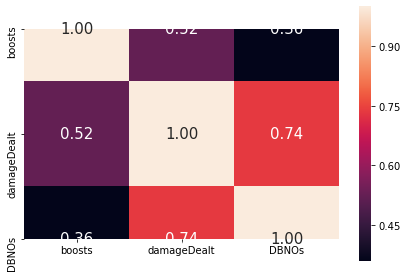

In [0]:
import numpy as np


cm = np.corrcoef(df_train[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
ｋplt.show()